In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2005-2021/World Happiness Report 2005-2021.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2005-2021/World Happiness Report 2005-2021.csv')
df

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [4]:
df.head(30)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179


In [5]:
#check for missing values

df.isna().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [6]:
print(df[df['Generosity'].isnull()].head(60))

                   Country name  Year  Life Ladder  Log GDP per capita  \
12                  Afghanistan  2021     2.436034                 NaN   
30                      Algeria  2014     6.354898            9.351205   
31                      Algeria  2016     5.340854            9.378069   
72                    Australia  2005     7.340688           10.650703   
118                     Bahrain  2012     5.027187           10.715217   
119                     Bahrain  2013     6.689711           10.756430   
120                     Bahrain  2014     6.165134           10.783138   
155                     Belgium  2005     7.262290           10.743808   
229                      Brazil  2005     6.636771            9.438745   
235                      Brazil  2012     6.660004            9.647226   
361                       China  2006     4.560495            8.696139   
449                        Cuba  2006     5.417869                 NaN   
463                      Cyprus  2021 

In [7]:
# rename  columns

df.columns = ['country', 'year', 'life_rating', 'log_gdp', 'social_support', 'LE_at_birth', 'freedom', 'generosity', 
                'perceptions_corruption', 'positive', 'negative', 'govt_confidence']


df

,country,year,life_rating,log_gdp,social_support,LE_at_birth,freedom,generosity,perceptions_corruption,positive,negative,govt_confidence
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [8]:
# use a time interpolation based on the years for each country to fill in missing values

import datetime

df_new = pd.DataFrame(columns=df.columns)

for country in df.country.unique():
    df_filtered = df[df.country == country]
    df_filtered['time'] = df_filtered.apply(lambda x: datetime.date(x['year'], 6, 30), axis=1)
    df_filtered['time'] = pd.to_datetime(df_filtered['time'], format='%Y-%m-%d')
    df_filtered.set_index('time', inplace=True)
#     df_filtered.drop(columns=['country'], inplace=True)
    
    # Apply time-based interpolation along each row (across columns)
    df_filtered = df_filtered.iloc[:, 1:].interpolate(method='time')
    
    df_filtered.insert(0, 'country', country)
    df_new = df_new.append(df_filtered)

df_new

,country,year,life_rating,log_gdp,social_support,LE_at_birth,freedom,generosity,perceptions_corruption,positive,negative,govt_confidence
2008-06-30,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
2009-06-30,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2010-06-30,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
2011-06-30,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
2012-06-30,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2018-06-30,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2019-06-30,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2020-06-30,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [9]:
df_new.isna().sum()

country                     0
year                        0
life_rating                 0
log_gdp                    17
social_support              4
LE_at_birth                38
freedom                     8
generosity                 50
perceptions_corruption     44
positive                    8
negative                    6
govt_confidence           109
dtype: int64

We see that there are still some missing values, which will be due to varying scenarios (either the initial year had null values, in which case there was no interpolcation, or all the values in a feature for a given country is null, in which case there is also nothing to interpolate). We can address the first scenario using a backfill

In [10]:
df_new.reset_index(inplace=True, drop=True)

for country in df_new.country.unique():
    df_filtered = df_new[df_new.country == country]
    df_filtered.bfill(inplace=True)
    df_new.loc[df_filtered.index[0]:df_filtered.index[-1]] = df_filtered

df_new

,country,year,life_rating,log_gdp,social_support,LE_at_birth,freedom,generosity,perceptions_corruption,positive,negative,govt_confidence
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [11]:
df_new.isna().sum()

country                    0
year                       0
life_rating                0
log_gdp                   16
social_support             1
LE_at_birth               38
freedom                    0
generosity                16
perceptions_corruption    29
positive                   2
negative                   1
govt_confidence           97
dtype: int64

In [12]:
df_new[df_new.isnull().any(axis=1)].head(50)

,country,year,life_rating,log_gdp,social_support,LE_at_birth,freedom,generosity,perceptions_corruption,positive,negative,govt_confidence
27,Algeria,2010,5.463567,9.302982,0.810234,65.500000,0.592696,-0.207632,0.618038,0.502736,0.254897,NaN
28,Algeria,2011,5.317194,9.312737,0.810234,65.599998,0.529561,-0.182975,0.637982,0.502736,0.254897,NaN
29,Algeria,2012,5.604596,9.326657,0.839397,65.699997,0.586663,-0.174457,0.690116,0.540059,0.229716,NaN
30,Algeria,2014,6.354898,9.351205,0.818189,65.900002,0.526699,-0.172338,0.693977,0.558359,0.176866,NaN
31,Algeria,2016,5.340854,9.378069,0.748588,66.099998,0.466653,-0.170217,0.697844,0.565026,0.377112,NaN
32,Algeria,2017,5.248912,9.370536,0.806754,66.199997,0.436670,-0.169157,0.699774,0.554529,0.288710,NaN
33,Algeria,2018,5.043086,9.361402,0.798651,66.300003,0.583381,-0.148098,0.758704,0.533725,0.292946,NaN
34,Algeria,2019,4.744627,9.352013,0.803259,66.400002,0.385083,0.002798,0.740609,0.544428,0.215198,NaN
35,Algeria,2020,5.437755,9.281301,0.867649,66.500000,0.573891,-0.118536,0.724264,0.524169,0.310630,NaN
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN


It looks like now the remaining missing values are due to the country having missing values for all values of a feature. After some feature processing, we'll create a function that runs a model to predict a specified feature, in which we'll remove relevant rows with missing values

In [13]:
# address missing values. To do this we will take the average of all similar countries based on their life rating. 

# group dataframe by country

# df_countries = df.groupby(['country', 'year']).mean().reset_index()

# countries = df['country'].unique()


# df_countries_new = pd.DataFrame(columns=df_countries.columns)


# # for country in countries:
# #     df_test = df_countries[df_countries['country'] == country]
# #     for year in df_test['year']:
# #         for column in df_test.iloc[:, 2:]:
# #             country_rating = df_countries[(df_countries['country'] == country) & (df_countries['year'] == year)]['life_rating'].iloc[0]
# #             condition = (df_countries['year'] == year) & \
# #             (df_countries['life_rating'] >= country_rating * 0.95) & \
# #             (df_countries['life_rating'] <= country_rating * 1.05)
# #             if math.isnan(df_test[df_test['year'] == year][column]) is True:
# #                 df_filter = df_countries.loc[condition]
# #                 df_test[column] = df_filter[column].mean()
# #     df_countries_new = df_countries_new.append(df_test, ignore_index=True)


# # for country in countries:
# #     counter = 0
# #     for column in df.iloc[:, 1:]:
# #         counter = 0
# #         for value in df[df['country'] == country][column]:
# #             if math.isnan(value) is True:
# #                 print(column)
# #                 print(df[df['country'] == country][column].iloc[counter])
# #                 df[df['country'] == country][column].iloc[counter] = df_countries_new[df_countries_new['country'] == country][column]
# #             else:
# #                 continue
# #             counter += 1

# # check that dataframe no longer has any null values
# df_countries_new.isna().sum()

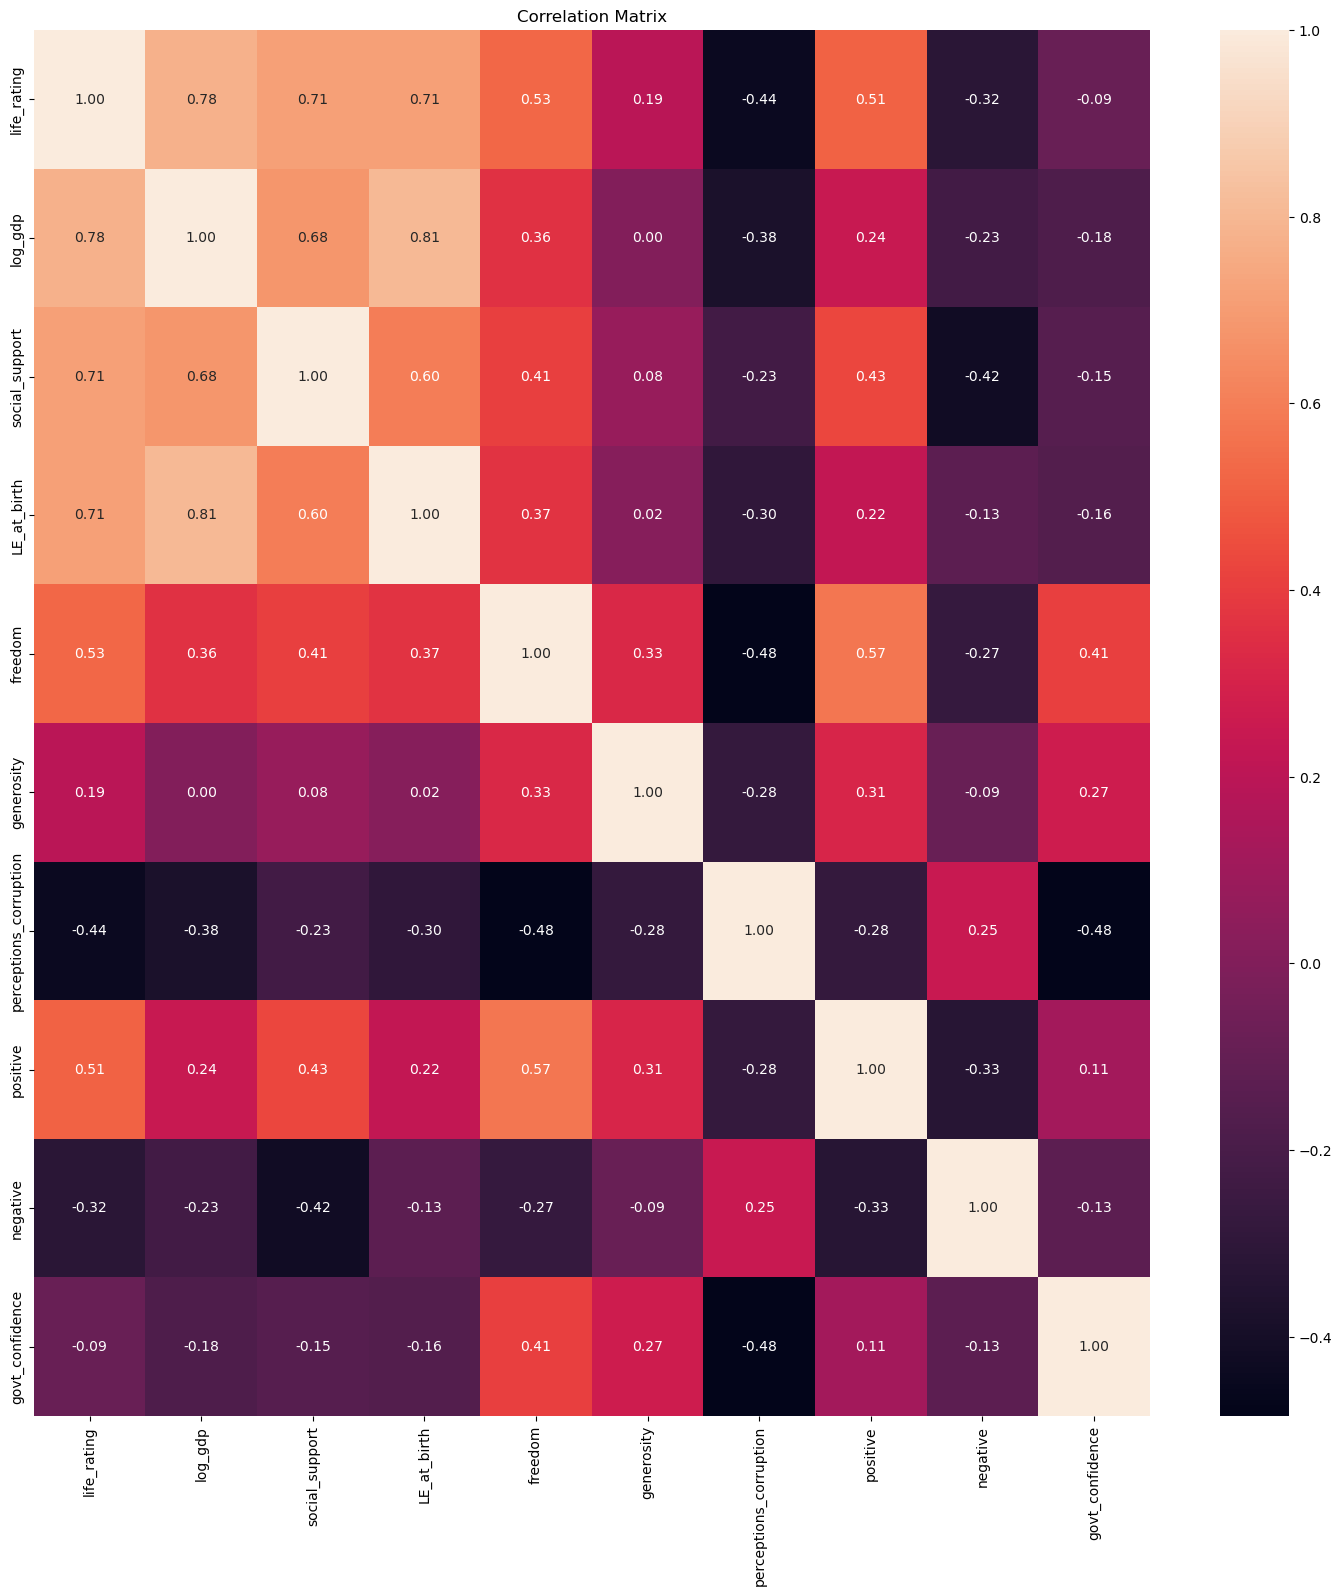

In [14]:
f,ax = plt.subplots(figsize=(18,18))
plt.title('Correlation Matrix')
sns.heatmap(df_new.corr(method='pearson'), annot=True, fmt = '.2f', ax=ax)
plt.show()

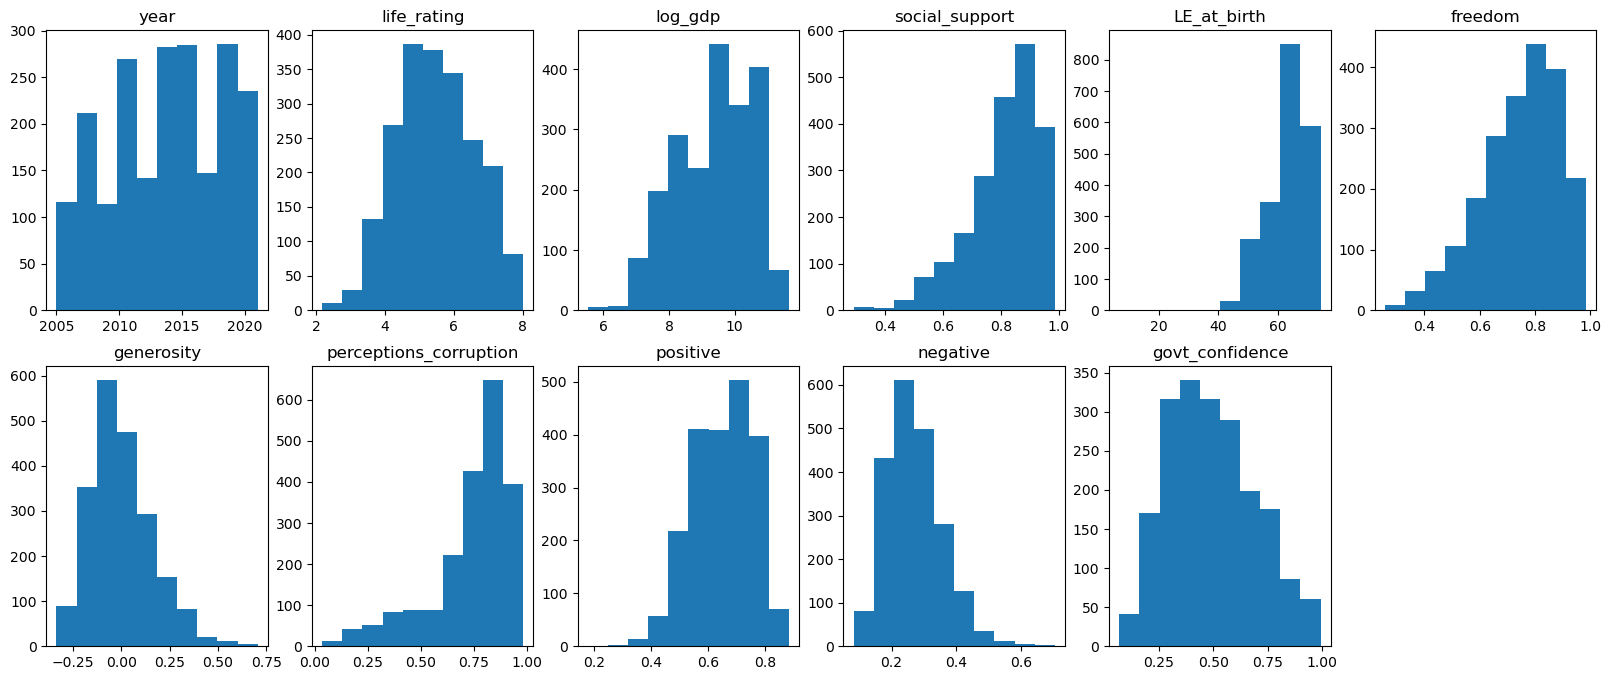

<Figure size 640x480 with 0 Axes>

In [15]:
# check distributions for each of the features

fig, axs = plt.subplots(2, 6, figsize=(20, 8))

row = 0
col = 0

for count, val in enumerate(df_new.columns[1:]):
    axs[row, col].hist(data=df_new, x=val)
    axs[row, col].set_title(f'{val}')
    if col == 5 and row == 0:
        row += 1
        col = 0
    else:
        col += 1

fig.delaxes(axs[1, 5])
plt.show()
plt.clf()

In [16]:
#Use normalisation to address skewed distributions. In this case, social support, life expectancy at birth, freedom, perceptions corruption, and government confidence are not normally distributed

skewed_cols = df_new.columns[(df.columns == 'social_support') | (df.columns == 'LE_at_birth') | (df.columns == 'freedom') | (df.columns == 'perceptions_corruption') | (df.columns == 'govt_confidence')]

scaler = MinMaxScaler()

for i in skewed_cols:
    df_new[i] = scaler.fit_transform(np.array(df_new[i]).reshape(-1, 1))

In [17]:
df_new['year'] = df_new.year.astype(float)

In [18]:
class Regression:
    def __init__(self, data):
        self.data = data.dropna(how='any').reset_index()
        
    def data(self):
        return self.data

    def model(self, predictor):
        df = self.data.loc[:, ~self.data.columns.isin([predictor, 'country'])]
        mean = df.mean(axis=0)
        sttd = df.std(axis=0)
        data_standardized = (df - mean) / sttd
        
        pca = PCA(n_components=2)
        x = pca.fit_transform(data_standardized)
        y = self.data[predictor]

        # Separate arrays for each principal component
        pc1_array = x[:, 0]
        pc2_array = x[:, 1]

        model = LinearRegression()
        model.fit(x, y)
        
        self.model = model
        
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(pc1_array, pc2_array, y, alpha=0.4, s=1)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('y')
        plt.show()

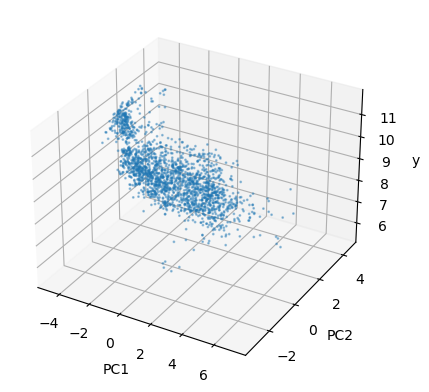

In [19]:
regr = Regression(df_new)
regr.model('log_gdp')